# The most important plots for Data Scientist - How, when to use them, its interpretation and limitations!

# KS PLOT

The Kolmogorov-Smirnov (KS) plot is a graphical tool used to compare two empirical distribution functions (EDFs) and to quantify the difference between them. 
Here's how to interpret the plot, use it, and understand when it is appropriate to do so:
Interpretation of the KS Plot:

    CDF Curves:
        The blue and red lines on the KS plot represent the cumulative distribution functions of two different datasets. These lines show the proportion 
        of observations that fall below or at a certain value.

    KS Statistic:
        The KS statistic is the maximum vertical distance between the two CDFs. In the plot, this is visually represented by the grey shaded area. It quantifies how much the distributions differ.

    Significance:
        The p-value accompanying the KS statistic indicates whether the observed difference is statistically significant. A small p-value (commonly less than 0.05) suggests that the distributions are significantly different.

How to Use the KS Plot:

    Model Evaluation:
        In predictive modeling, especially for binary classification, the KS plot is used to assess the model's ability to distinguish between the two classes. The higher the KS statistic, the better the model is at discrimination.

    Goodness of Fit:
        To check the goodness of fit, the KS plot can be used to compare the EDF of sample data against a theoretical distribution's CDF. It helps to assess if the sample data follow a specified distribution.

    Two-Sample Comparison:
        When comparing two samples, for instance, experimental versus control groups, to see if they differ significantly in terms of their distribution.

When to Use the KS Plot:

    Non-Parametric Analysis:
        It is best used when the form of the distribution is not assumed to follow any particular parametric form (non-parametric).

    Comparative Studies:
        It is suitable when comparing two empirical distributions, either from different samples or one sample and a theoretical distribution.

    Large Sample Sizes:
        The KS test tends to be more reliable with larger sample sizes because it relies on the empirical distribution function, which becomes a better estimate of the true distribution as sample size increases.

Limitations and Considerations:

    Sample Size Sensitivity:
        With very large sample sizes, even small differences can become statistically significant.

    Applicability to Continuous Distributions:
        The KS test is most appropriate for continuous distributions. It can be used for discrete distributions, but there are better-suited tests for such cases.

    Two-Sample Limitation:
        The classic KS test compares only two samples. Extensions or different tests are required for comparing more than two samples.

In summary, the KS plot is a versatile tool in data analysis for non-parametric comparison of distributions. It is widely used for model validation in classification problems and for testing hypotheses about distributional properties in a dataset.

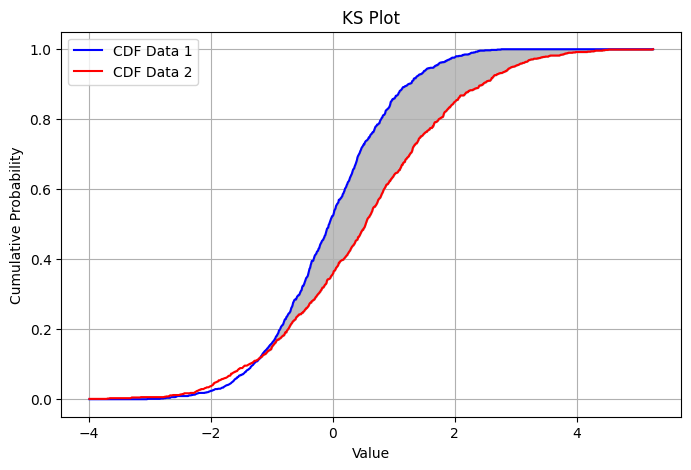

KS statistic: 0.243
p-value: 2.5766074972787e-26


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generate two sample datasets
np.random.seed(0)  # For reproducibility
data1 = np.random.normal(loc=0.0, scale=1.0, size=1000)  # Data from the first distribution
data2 = np.random.normal(loc=0.5, scale=1.5, size=1000)  # Data from the second distribution

# Calculate the KS statistic and p-value
ks_statistic, p_value = ks_2samp(data1, data2)

# Generate a range of values over which to evaluate the CDFs
values = np.linspace(min(np.min(data1), np.min(data2)), max(np.max(data1), np.max(data2)), 1000)
cdf1 = np.searchsorted(np.sort(data1), values, side='right') / len(data1)
cdf2 = np.searchsorted(np.sort(data2), values, side='right') / len(data2)

# Create the KS plot
plt.figure(figsize=(8, 5))
plt.plot(values, cdf1, label='CDF Data 1', color='blue')
plt.plot(values, cdf2, label='CDF Data 2', color='red')
plt.title('KS Plot')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend(loc='best')
plt.grid(True)

# Highlight the KS statistic - the maximum distance between the CDFs
plt.fill_between(values, cdf1, cdf2, where=(cdf1 > cdf2), interpolate=True, color='grey', alpha=0.5)

# Show the plot
plt.show()

# Print out KS statistic and p-value
print(f"KS statistic: {ks_statistic}")
print(f"p-value: {p_value}")



# SHAP Plot

The SHAP (SHapley Additive exPlanations) plot is a powerful visualization tool that explains the output of machine learning models. 
It uses Shapley values from game theory to
attribute the effect of each feature on the prediction of each instance. Here's how to interpret the plot, use it, and understand when 
it's appropriate to do so:
Interpretation of the SHAP Plot:

    Feature Impact:
        Each point on the SHAP plot represents a Shapley value for a feature and an instance. The position on the horizontal axis shows the impact of that feature on the model's prediction for that instance.

    Feature Value:
        The color represents the feature value (red high, blue low). This helps to visualize how the value of the feature affects the prediction.

    Overall Importance:
        Features are ordered by the sum of SHAP value magnitudes over all samples. Features at the top of the plot are more important.

    Individual Importance:
        The vertical dispersion of the points for a given feature indicates the variability of the SHAP values for that feature across the data. A large spread implies that the feature 
        has different effects for different instances.

How to Use the SHAP Plot:

    Model Interpretation:
        Use SHAP plots to explain individual predictions of complex models, making them understandable to stakeholders.

    Feature Importance:
        Identify which features are most important for a model. SHAP plots can reveal feature importance not only globally but also how features influence individual predictions.

    Model Debugging:
        Detect if the model is using features in unexpected ways, which could be a sign of overfitting, data leakage, or other data issues.

    Fairness and Bias:
        Assess whether the model is relying on features in a way that could introduce bias or unfairness into its predictions.

When to Use the SHAP Plot:

    Complex Models:
        Particularly useful for models that are otherwise "black boxes," like deep learning or ensemble methods.

    Stakeholder Explanation:
        When you need to explain model behavior to stakeholders who might not have a technical background.

    High-Stakes Decisions:
        In situations where decisions based on model predictions have significant consequences, like healthcare, finance, or law.

Limitations and Considerations:

    Computation Time:
        Computing SHAP values can be time-consuming, especially for complex models and large datasets.

    Interpretation Complexity:
        The interpretation can become complex with many features, especially if interactions between features are strong.

    Model Compatibility:
        While SHAP is model-agnostic in theory, in practice, it integrates more easily with certain types of models (like tree-based models).

In summary, SHAP plots offer detailed insights into the decision-making process of machine learning models. They balance the need for accuracy in model predictions with the need for interpretability in model explanations, helping to bridge the gap between model performance and human understanding.

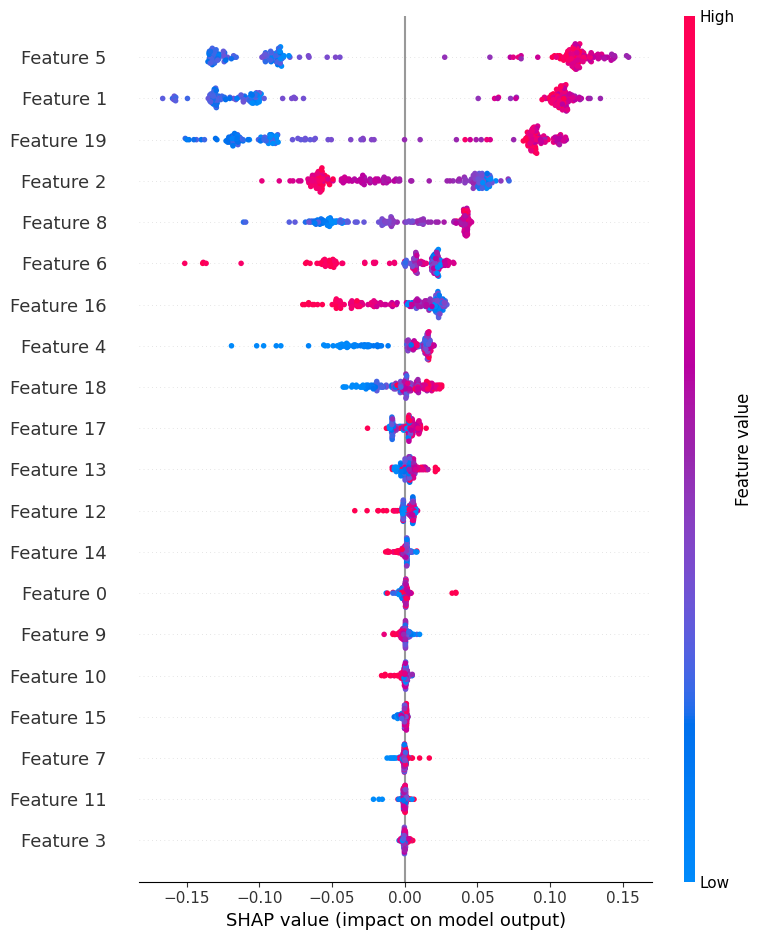

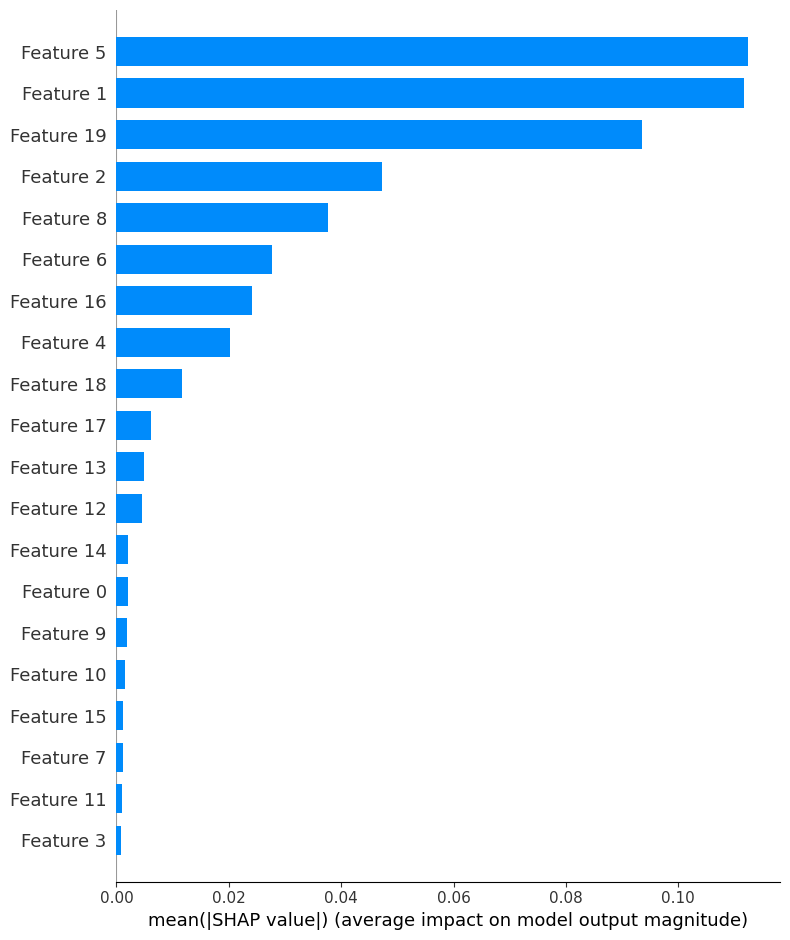

In [2]:
#!pip install shap
import shap
shap.initjs()
import shap
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf_clf.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the positive class
shap.summary_plot(shap_values[1], X_test, plot_type="dot")

# SHAP values can also be plotted as a bar plot summarizing the mean absolute impact
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


# QQ Plot

Interpretation of the QQ Plot:

    Points on the line: If the points lie on the y=xy=x line, then the data follows the same distribution as the theoretical one (in this case, normal distribution).

    Deviations from the line: If the points deviate from the line in a systematic way, this indicates that the data does not follow the distribution. For example:
        If the points lie above the line at the ends, the data distribution has heavier tails than the normal distribution.
        If the points lie below the line at the ends, the data distribution has lighter tails than the normal distribution.

How to Use the QQ Plot:

    Assessing Normality: QQ plots are commonly used to assess whether data follows a normal distribution, which is an assumption in many statistical tests and models.

    Comparing Distributions: You can also compare the distribution of your data to any theoretical distribution by using the dist parameter of the qqplot function.

When to Use the QQ Plot:

    Before Parametric Statistical Testing: When you want to validate assumptions of normality before conducting parametric statistical tests.

    Model Residual Analysis: To check the normality of residuals in regression models.

    Data Transformation Decisions: If data is not normal, a QQ plot can guide decisions on data transformation (like logarithmic or square root transformations).

Limitations and Considerations:

    Subjectivity: The interpretation of QQ plots can be somewhat subjective, especially when determining "how close" the points are to the reference line.

    Sample Size Sensitivity: Small sample sizes might not provide a clear picture, while very large samples might show deviations for even small departures from normality.

    Only for Continuous Data: QQ plots are intended for continuous data, not discrete data.

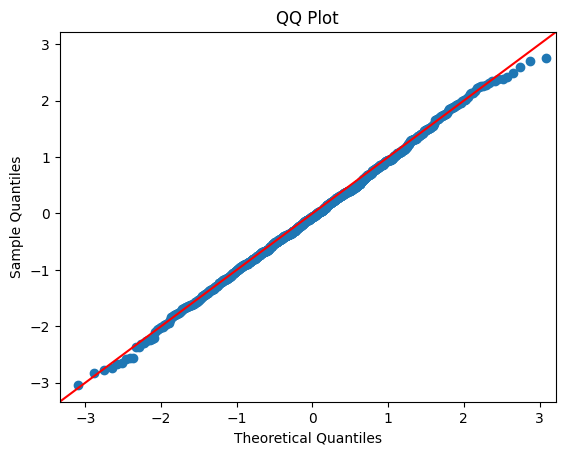

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some data that follows a normal distribution
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Generate a QQ plot
fig = sm.qqplot(data, line='45')
plt.title('QQ Plot')
plt.show()


# Cumulative Explained Variance

The Cumulative Explained Variance plot is a critical tool in Principal Component Analysis (PCA), a technique in dimensionality reduction. This plot helps in understanding how many principal components are needed to explain a certain percentage of the variance in the dataset. Here's a detailed explanation of its interpretation, usage, when to use it, and its limitations and considerations:
Interpretation of the Cumulative Explained Variance Plot:

    Explained Variance Ratio vs. Number of Components:
        The plot shows the proportion of the dataset's total variance that is explained by each principal component. The cumulative sum is then plotted against the number of components.
        The y-axis represents the cumulative explained variance ratio, and the x-axis represents the number of principal components.

    Identifying the Optimal Number of Components:
        The point at which the curve starts to plateau or where there's an "elbow" indicates that additional components do not significantly increase the explained variance. This point suggests an optimal number of components to retain.

How to Use the Cumulative Explained Variance Plot:

    Dimensionality Reduction:
        To decide how many principal components to keep when reducing the dimensionality of the data, balancing between information retention and simplification.

    Feature Engineering:
        In preprocessing, to transform the data into a lower-dimensional space for subsequent machine learning tasks.

When to Use the Cumulative Explained Variance Plot:

    Preprocessing in Machine Learning:
        Particularly useful before applying machine learning algorithms to reduce the complexity of the data, speed up algorithms, and potentially improve model performance.

    Exploratory Data Analysis:
        To understand the underlying structure of the data and to identify the most informative features.

Limitations and Considerations:

    Information Loss:
        Reducing the number of components may lead to a loss of information. The challenge is to find a balance between data simplification and retention of relevant information.

    Subjective Decision:
        Determining the "elbow" in the curve can be subjective. Different criteria might lead to different choices for the number of components.

    Assumption of Linearity:
        PCA assumes that the principal components are a linear combination of the original features, which might not capture complex structures in the data.

    Sensitive to Scaling:
        PCA is affected by the scale of the features. Standardizing or normalizing data before applying PCA is often necessary.

    Not Suitable for All Data Types:
        PCA works best for data with linear relationships. For complex, non-linear relationships, other techniques like t-SNE or UMAP might be more appropriate.

In summary, the Cumulative Explained Variance plot is a valuable tool in PCA for dimensionality reduction, helping to visualize how much variance is explained by different numbers of components. It guides the decision on how many principal components to retain for further analysis while balancing the trade-off between complexity and information loss.


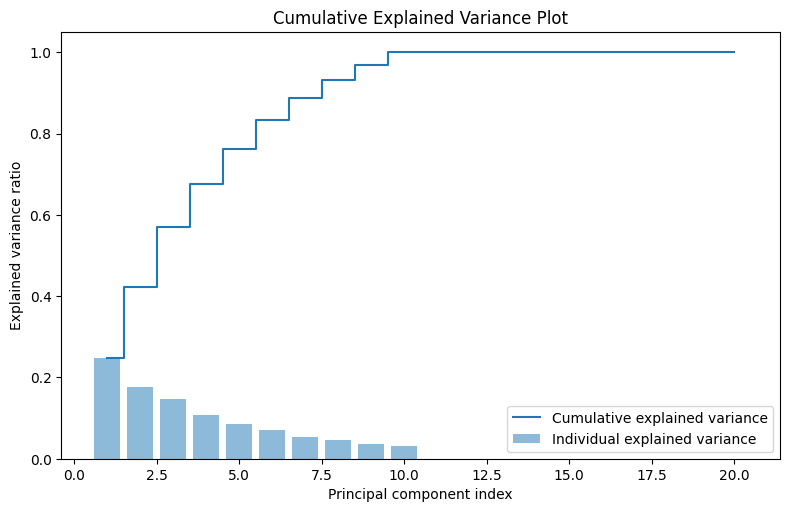

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=0)

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Fit PCA
pca = PCA().fit(X_std)

# Calculate the cumulative sum of explained variances
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cumulative_var) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_var) + 1), cumulative_var, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Cumulative Explained Variance Plot')
plt.show()


# Gini-impurity vs Entropy

The Gini Impurity vs. Entropy plot is an important tool in the context of decision trees and other tree-based machine learning models. Both Gini Impurity and Entropy are criteria used to measure the "purity" or homogeneity of a subset of data and to decide on the optimal way to split the data at each node in a tree. Here's a detailed explanation of their interpretation, usage, when to use them, and their limitations and considerations:
Interpretation of Gini Impurity vs. Entropy Plot:

    Gini Impurity:
        Gini Impurity measures the likelihood of an incorrect classification of a new instance, assuming that the instance is randomly classified according to the distribution of class labels in the dataset.
        Gini Impurity is high when the class distribution is mixed and low (zero) when all instances in the subset belong to the same class.

    Entropy:
        Entropy, stemming from information theory, measures the amount of information disorder or uncertainty.
        Entropy is also high when the class distribution is mixed and zero when all instances are of the same class.

How to Use Gini and Entropy in Decision Trees:

    Choosing a Criterion for Splitting:
        Decision tree algorithms like CART (Classification and Regression Trees) use Gini Impurity as a criterion, while algorithms like ID3 or C4.5 use Entropy.
        The choice between Gini Impurity and Entropy often depends on the specific dataset and the complexity of the problem.

When to Use Gini vs. Entropy:

    Small to Medium-Sized Datasets:
        Both measures perform well on most datasets. Gini is often preferred due to its computational efficiency.

    Large Datasets and Real-time Applications:
        Gini can be more efficient to compute than Entropy, making it a better choice for large datasets or applications requiring real-time decision-making.

Limitations and Considerations:

    Computational Complexity:
        Gini Impurity is typically faster to compute than Entropy, as it doesn't involve logarithmic calculations.

    Bias in Splitting:
        Entropy tends to prefer splits that produce equal-sized groups and is more sensitive to changes in class proportions than Gini Impurity.

    Similar Performance:
        In practice, the difference in performance between Gini Impurity and Entropy is often negligible. The choice between them usually doesn't significantly affect the performance of the model.

    Overfitting:
        Both criteria can lead to overfitting in decision trees. Techniques like pruning, setting a minimum number of samples per leaf, or limiting tree depth are necessary to mitigate this.

    Data Sensitivity:
        Both Gini and Entropy are sensitive to the class distribution in the dataset. An imbalanced dataset can lead to biased trees, so it's crucial to address class imbalance before training.

In summary, Gini Impurity and Entropy are both effective measures for determining how to split data in tree-based models. The choice between them often comes down to considerations of computational efficiency and specific problem characteristics, rather than significant differences in their ability to produce high-quality splits.

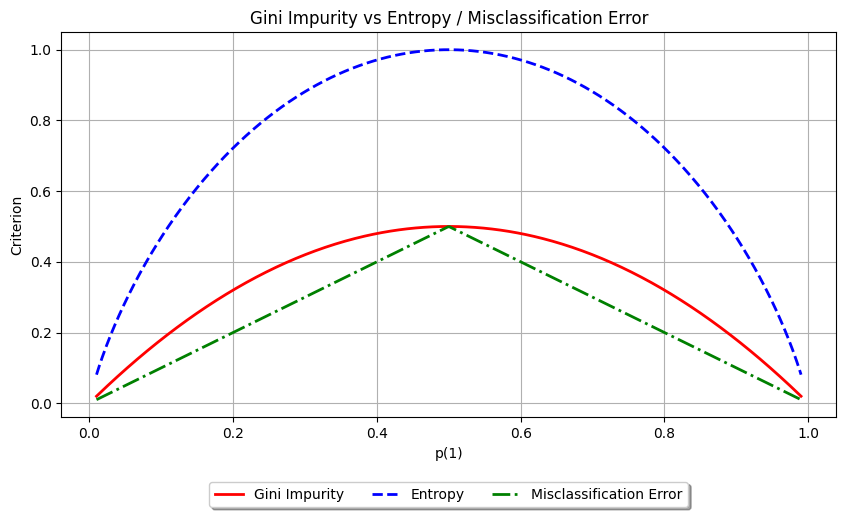

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of probabilities from 0.01 to 0.99 to avoid division by zero in entropy
p = np.linspace(0.01, 0.99, 500)

# Gini Impurity and Entropy calculations
gini = 2 * p * (1 - p)
entropy = -(p * np.log2(p) + (1 - p) * np.log2(1 - p))
misclassification_error = 1 - np.max(np.vstack((p, 1 - p)), axis=0)

# Plot the Gini Impurity and Entropy
plt.figure(figsize=(10, 5))
plt.plot(p, gini, label='Gini Impurity', color='red', linestyle='-', linewidth=2)
plt.plot(p, entropy, label='Entropy', color='blue', linestyle='--', linewidth=2)
plt.plot(p, misclassification_error, label='Misclassification Error', color='green', linestyle='-.', linewidth=2)

# Adding title and labels
plt.title('Gini Impurity vs Entropy / Misclassification Error')
plt.xlabel('p(1)')
plt.ylabel('Criterion')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.grid(True)
plt.show()

# Bias Variance Tradeoff

The Bias-Variance Tradeoff is a central concept in machine learning, particularly in supervised learning. It helps in understanding and navigating the compromises between underfitting and overfitting. Here's a more detailed look:
Interpretation of the Bias-Variance Tradeoff Plot:

    Bias (Blue Curve):
        Bias measures how far off the predictions are from the correct values in general. High bias can cause an algorithm to miss relevant relations between features and target outputs (underfitting).
        Typically, simpler models (e.g., linear models) have a higher bias.

    Variance (Red Curve):
        Variance measures how much the predictions vary for a given data point. High variance can cause overfitting, where a model captures random noise in the data.
        Typically, more complex models (e.g., deep neural networks) have higher variance.

    Total Error (Green Curve):
        This is the sum of squared bias and variance. It shows the total error of the model.

How to Use the Plot:

    Model Selection: Use the tradeoff plot to understand whether a model is too simple (high bias) or too complex (high variance). Adjust model complexity accordingly.
    Regularization: Apply regularization techniques to balance bias and variance. For instance, L1 or L2 regularization in linear models.
    Cross-Validation: Use cross-validation techniques to get an estimate of how well your model generalizes to unseen data.

When to Use:

    During Model Training: To monitor and adjust the complexity of the model.
    Model Evaluation: To understand if the model is underfitting or overfitting and to make informed decisions about steps to mitigate these issues.

Limitations and Considerations:

    Tradeoff: It's often a balancing act – reducing bias might increase variance and vice versa. Optimal model complexity is usually found in the middle ground.

    Model Dependency: Different models have different bias-variance characteristics. For example, ensembles of decision trees often have low bias but can have high variance.

    Data Dependency: The tradeoff also depends on the nature of the data. Noisy data can lead to higher variance.

    No Exact Measure: It's more of a conceptual tool. In practice, you don't usually calculate bias and variance explicitly but infer their presence from model performance.

    Over-simplification: It's a simplification to assume that only bias and variance determine model performance. The true relationship can be more complex, especially with more data and complex models.

In practice, the Bias-Variance Tradeoff helps in guiding the process of model selection, training, and validation. Understanding this tradeoff is crucial for creating models that generalize well to new, unseen data.

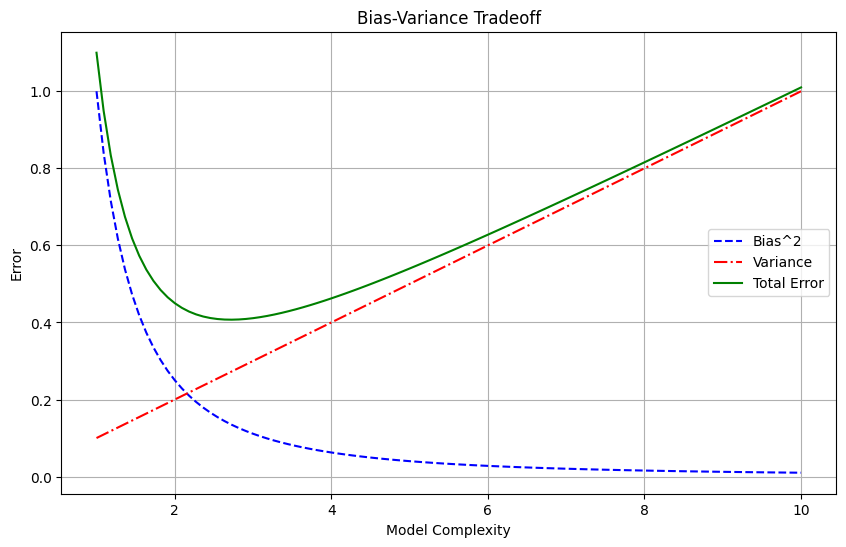

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating model complexity values
model_complexity = np.linspace(1, 10, 100)

# Simulating bias and variance
# Bias: decreases as model complexity increases
# Variance: increases as model complexity increases
bias_squared = (1 / model_complexity) ** 2
variance = model_complexity / 10

# Total error is the sum of bias squared and variance
total_error = bias_squared + variance

# Plotting the Bias-Variance Tradeoff
plt.figure(figsize=(10, 6))
plt.plot(model_complexity, bias_squared, label='Bias^2', color='blue', linestyle='--')
plt.plot(model_complexity, variance, label='Variance', color='red', linestyle='-.')
plt.plot(model_complexity, total_error, label='Total Error', color='green', linestyle='-')

plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve

The Receiver Operating Characteristic (ROC) curve is a fundamental tool used in evaluating binary classification systems. It is a graphical representation that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. Here's a detailed overview of its interpretation, usage, when to use it, and its limitations and considerations:
Interpretation of the ROC Curve:

    True Positive Rate (TPR) vs. False Positive Rate (FPR):
        The ROC curve plots TPR (Sensitivity) on the y-axis and FPR (1 - Specificity) on the x-axis at various threshold settings.
        TPR is the ratio of correctly predicted positive observations to all observations in the actual class.
        FPR is the ratio of incorrectly predicted positive observations in the negative class.

    Area Under the Curve (AUC):
        The AUC provides a single measure of the model's performance across all thresholds. An AUC of 1.0 means perfect classification, while an AUC of 0.5 denotes a model no better than random guessing.

How to Use the ROC Curve:

    Threshold Selection:
        The ROC curve can help in choosing a threshold that balances TPR and FPR for a specific context, which is crucial in applications where false positives and false negatives have different costs.

    Model Comparison:
        Comparing the ROC curves of different models can provide insights into their relative performance. The model with a curve that is more towards the top-left corner is considered better.

When to Use the ROC Curve:

    Binary Classification Problems:
        Ideal for evaluating classifiers on binary classification tasks.

    Imbalanced Data:
        Useful for evaluating performance on imbalanced datasets, as it focuses on the classification of the positive class.

Limitations and Considerations:

    Not Ideal for Highly Imbalanced Data:
        In cases of extreme class imbalance, the FPR might not provide a clear picture of a model's performance. Precision-Recall curves are often more informative in such scenarios.

    Threshold-Dependent:
        The ROC curve evaluates a classifier without considering the class distribution or the cost of errors. In practice, the choice of threshold can have a significant impact.

    AUC Oversimplification:
        While AUC provides a useful summary, it can be misleading. Two very different ROC curves can have the same AUC.

    Doesn’t Reflect Class Distribution Changes:
        The ROC curve remains unchanged even if the distribution of the positive and negative classes changes.

    Insensitive to Threshold Modifications:
        Small changes in the threshold that might be significant in some applications can go unnoticed in the ROC curve.

In summary, the ROC curve is a powerful tool for assessing the performance of binary classification models and is widely used in many domains. However, it is important to understand its limitations and to consider other evaluation metrics and plots (like Precision-Recall curves) especially when dealing with imbalanced datasets.

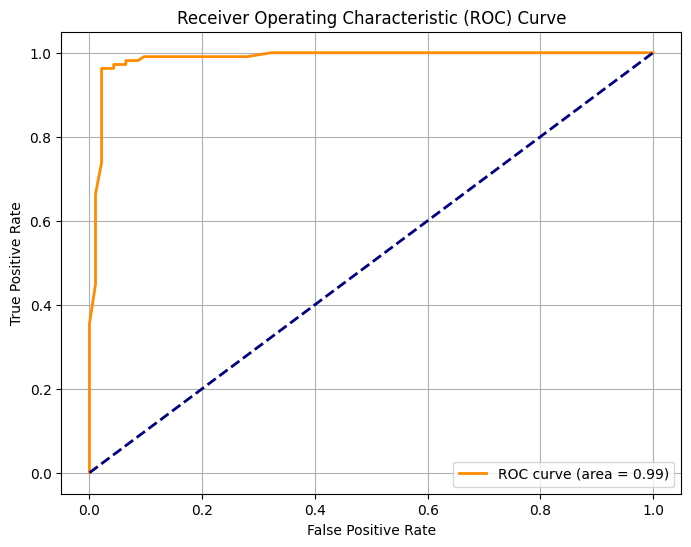

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_probs = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Precision Recall Curve

The Precision-Recall (PR) curve is a valuable tool in machine learning for evaluating the performance of binary classifiers, especially in situations of class imbalance. It provides a graphical representation of precision and recall metrics across different thresholds. Here's a detailed explanation of its interpretation, usage, when to use it, and its limitations and considerations:
Interpretation of the Precision-Recall Curve:

    Precision vs. Recall:
        Precision (on the y-axis) measures the accuracy of the positive predictions, i.e., the ratio of true positives to the total number of predicted positives.
        Recall (on the x-axis), also known as sensitivity or true positive rate, measures the ratio of true positives to all actual positives in the data.

    Area Under the Curve (AUC):
        The area under the PR curve provides a measure of the model’s ability to distinguish between classes. A higher area under the curve indicates better performance.

How to Use the Precision-Recall Curve:

    Threshold Tuning:
        The PR curve is useful for selecting a threshold that balances precision and recall according to the requirements of a specific application.

    Model Evaluation:
        Evaluate the performance of a binary classifier, especially in situations where one class is much more frequent than the other.

    Model Comparison:
        Compare different models: a model with a PR curve that lies above another indicates better performance.

When to Use the Precision-Recall Curve:

    Imbalanced Datasets:
        Particularly useful in scenarios with a significant class imbalance. For instance, in fraud detection, where fraudulent transactions are rare compared to legitimate ones.

    When Focusing on the Positive Class:
        When the performance regarding the positive (minority) class is more critical than the overall accuracy.

Limitations and Considerations:

    Not Suitable for Balanced Datasets:
        In cases where the class distribution is balanced, ROC curves may provide a more holistic view of the model's performance.

    Omits True Negatives:
        PR curves do not reflect the number of true negatives, which can be a critical measure in some applications.

    Threshold Dependency:
        While useful for understanding the trade-off between precision and recall, selecting the optimal threshold can be non-trivial and depends heavily on the specific costs of false positives and false negatives in the application domain.

    AUC Interpretation:
        A model with high recall but low precision can still have a relatively large area under the PR curve, which might lead to an overly optimistic interpretation of the model’s performance.

    Comparison Complexity:
        Comparing models using PR curves can be more complex than using ROC curves, especially when the curves intersect.

In summary, the Precision-Recall curve is crucial for evaluating and optimizing classifiers on imbalanced datasets, with a particular emphasis on the performance with respect to the minority class. Understanding and appropriately applying this tool is key in domains where precision and recall are more important than overall accuracy.


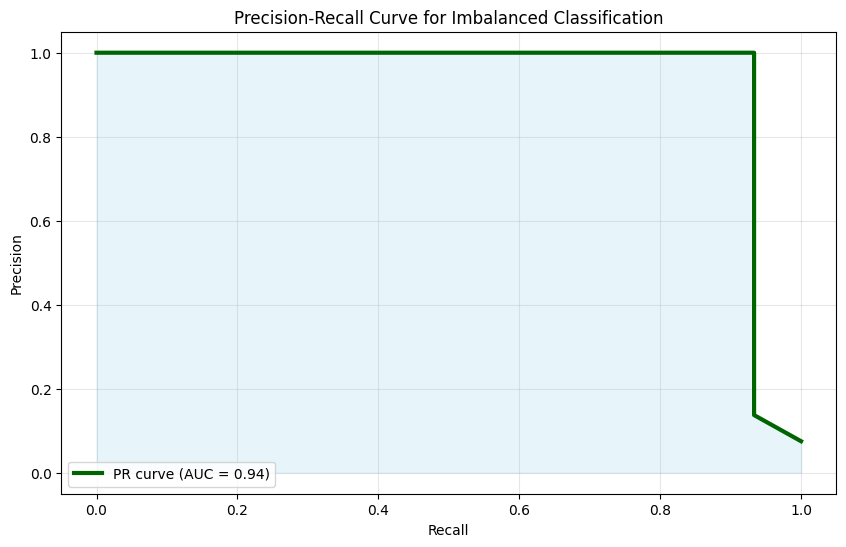

In [8]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Generate a synthetic binary classification dataset
# Adjusting the weights to simulate imbalance
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=0)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_scores = classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

# Plotting the Precision-Recall curve with improved style
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='darkgreen', lw=3, label=f'PR curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Imbalanced Classification')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.fill_between(recall, precision, alpha=0.2, color='skyblue')
plt.show()

# Elbow Curve

The Elbow Curve is a visual tool used in cluster analysis, particularly in K-means clustering. It helps to determine the optimal number of clusters into which the data can be partitioned. The curve plots the within-cluster sum of squares (WCSS) against the number of clusters. Here's a detailed explanation of its interpretation, usage, when to use it, and its limitations and considerations:
Interpretation of the Elbow Curve:

    WCSS vs. Number of Clusters:
        The x-axis represents the number of clusters, and the y-axis shows the within-cluster sum of squares (WCSS), a measure of the compactness of the clusters.
        The WCSS typically decreases as the number of clusters increases because the data points are closer to the centroids they are assigned to.

    Identifying the Elbow Point:
        The "elbow" in the curve represents the point where adding more clusters does not significantly improve the fitting of the model. This point is typically considered as an indication of the appropriate number of clusters.

How to Use the Elbow Curve:

    Determining Cluster Count:
        Use the curve to select a number of clusters for algorithms like K-means. The optimal number is found at the "elbow point," which is where the rate of decrease sharply changes.

    Data Segmentation:
        Particularly useful in market segmentation, organizing data into clusters based on feature similarity.

When to Use the Elbow Curve:

    Before Clustering:
        Used in the exploratory phase of data analysis when applying clustering techniques like K-means, especially when the number of clusters is not predefined.

    Unsupervised Learning Scenarios:
        Applicable in various domains, including customer segmentation, grouping genetic data, market price and cost modeling, etc.

Limitations and Considerations:

    Subjective Interpretation:
        Identifying the exact elbow point can be subjective and may not always be clear-cut.

    Dependence on Distance Measures:
        The effectiveness of the elbow method depends on the distance measure used within the clustering algorithm.

    Not Suitable for All Datasets:
        Some datasets may not exhibit a clear elbow, or there might be multiple elbows, making it challenging to select the correct number of clusters.

    Assumes Compact, Spherical Clusters:
        The method is most effective when the natural clusters in the data are compact and roughly spherical.

    Scale Sensitivity:
        The method can be sensitive to the scale of the features, and normalization or standardization might be necessary.

In practice, the Elbow Curve is a useful heuristic for getting a sense of the suitable number of clusters for K-means clustering. However, it's often beneficial to use it in conjunction with other methods and domain knowledge to make a well-informed decision.

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

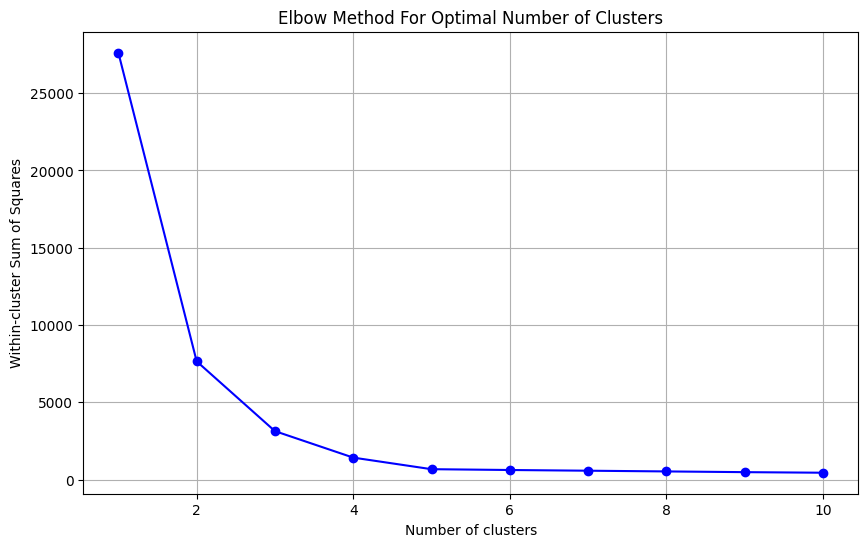

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data for clustering
X, _ = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)

# Calculating the within-cluster sum of square for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.grid(True)
plt.show()